In [3]:
import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

%pylab inline

%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [4]:
with open("x_liv_dedup.pkl", 'rb') as picklefile: 
    x_liv_dedup = pickle.load(picklefile)

with open("y_liv_dedup.pkl", 'rb') as picklefile: 
    y_liv_dedup = pickle.load(picklefile)
    
with open("y_train_liv_dedup.pkl", 'rb') as picklefile: 
    y_train_liv_dedup = pickle.load(picklefile)

with open("y_test_liv_dedup.pkl", 'rb') as picklefile: 
    y_test_liv_dedup = pickle.load(picklefile)

with open("x_train_liv_dedup.pkl", 'rb') as picklefile: 
    x_train_liv_dedup = pickle.load(picklefile)

with open("x_test_liv_dedup.pkl", 'rb') as picklefile: 
    x_test_liv_dedup = pickle.load(picklefile)

with open("x_train_scaled_liv_dedup.pkl", 'rb') as picklefile: 
    x_train_scaled_liv_dedup = pickle.load(picklefile)

with open("x_test_scaled_liv_dedup.pkl", 'rb') as picklefile: 
    x_test_scaled_liv_dedup = pickle.load(picklefile)
    
with open("x_scaled_liv_dedup.pkl", 'rb') as picklefile: 
    x_scaled_liv_dedup = pickle.load(picklefile)

with open("patientdataICD9_liv_dedup.pkl", 'rb') as picklefile: 
    patientdataICD9_liv_dedup = pickle.load(picklefile)

In [5]:
x_train = x_train_liv_dedup
y_train = y_train_liv_dedup
x_test = x_test_liv_dedup
y_test = y_test_liv_dedup
x = x_liv_dedup
y = y_liv_dedup

#### Reducing the classes to binary classes ('>30' is now also 'NO'):

In [6]:
y = y.str.replace('>30','NO')
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

In [5]:
# pulling these in from pickle now

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
NBmodel = naive_bayes.GaussianNB()
NBmodel.fit(x_train, y_train)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.129
             precision    recall  f1-score   support

        <30       0.09      0.98      0.17      1574
         NO       0.95      0.05      0.09     16036

avg / total       0.87      0.13      0.10     17610



In [12]:
def makematrix(y_test, y_pred):
    score = metrics.accuracy_score(y_test, y_pred)

    confm = metrics.confusion_matrix(y_test, y_pred, labels=list(y_test.unique()))
    confm = confm.astype('float') / confm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10,10))
    sns.heatmap(confm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

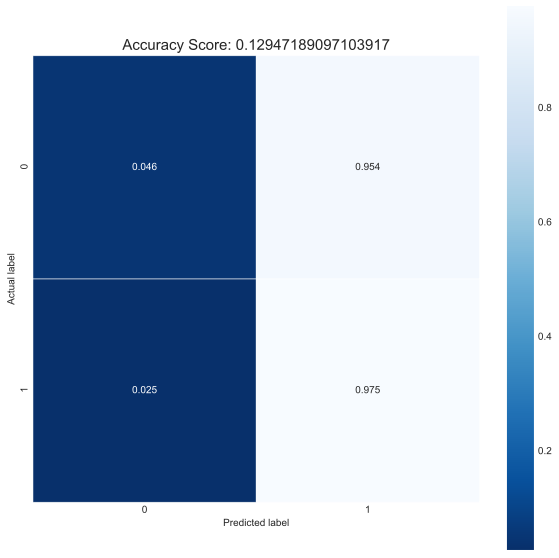

In [13]:
makematrix(y_test, y_pred)

#### Gaussian NB basically just predicted all <30, so recall for that class was great, but everything else was awful

In [14]:
y_test.value_counts()

NO     16036
<30     1574
Name: readmitted, dtype: int64

In [15]:
NBmodel = naive_bayes.BernoulliNB()
NBmodel.fit(x_train, y_train)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.908
             precision    recall  f1-score   support

        <30       0.27      0.02      0.03      1574
         NO       0.91      1.00      0.95     16036

avg / total       0.85      0.91      0.87     17610



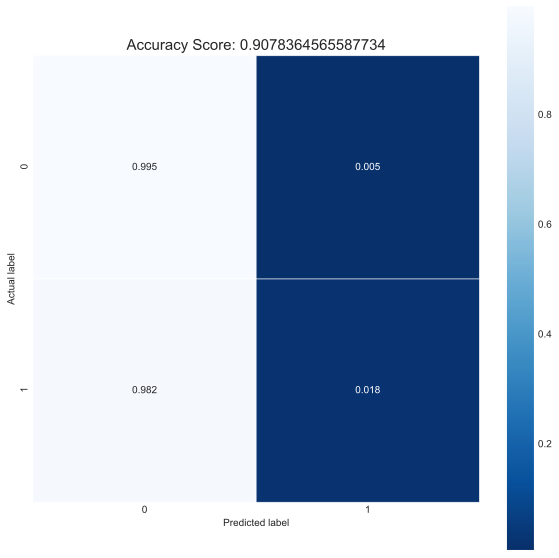

In [16]:
makematrix(y_test, y_pred)

#### I suppose this makes sense, because most of my data is categorical. I was really hoping for better performance from Gaussian, though.

In [17]:
NBmodel = naive_bayes.MultinomialNB()
NBmodel.fit(x_train, y_train)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.900
             precision    recall  f1-score   support

        <30       0.26      0.06      0.10      1574
         NO       0.91      0.98      0.95     16036

avg / total       0.86      0.90      0.87     17610



#### SMOTE:

In [6]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

In [7]:
NBmodel = naive_bayes.BernoulliNB()
NBmodel.fit(x_train_smote, y_train_smote)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.740
             precision    recall  f1-score   support

        <30       0.18      0.37      0.24      2839
         NO       0.91      0.79      0.84     22190

avg / total       0.82      0.74      0.78     25029



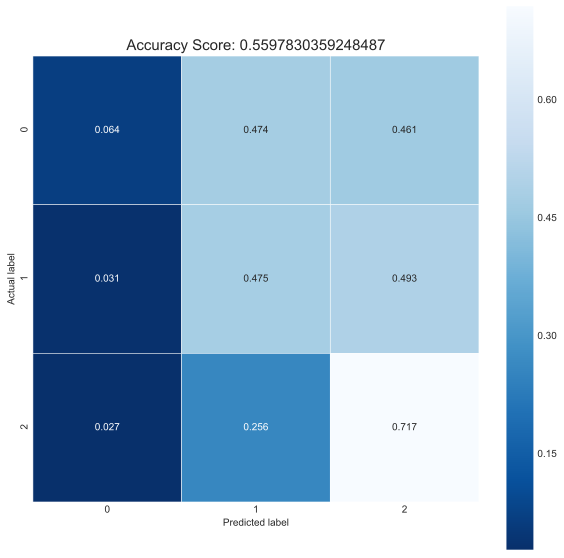

In [28]:
makematrix(y_test, y_pred)

#### SMOTE did worse across the board here. Wow. Ouch.

In [9]:
NBmodel = naive_bayes.GaussianNB()
NBmodel.fit(x_train_smote, y_train_smote)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.166
             precision    recall  f1-score   support

        <30       0.12      0.96      0.21      2839
         NO       0.93      0.06      0.12     22190

avg / total       0.84      0.17      0.13     25029



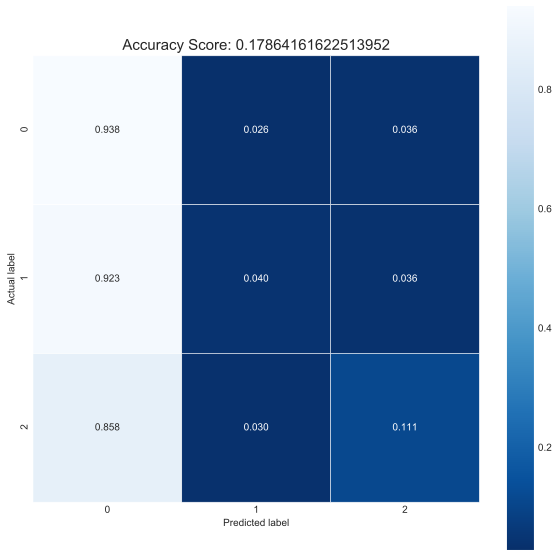

In [26]:
makematrix(y_test, y_pred)

#### Gaussian NB with SMOTE also basically just predicted all <30, so recall for that class was great, but everything else was awful

#### Undersampling:

In [18]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [19]:
# sns.countplot(y_train_undersampled);

In [37]:
NBmodel = naive_bayes.BernoulliNB()
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.610
             precision    recall  f1-score   support

        <30       0.13      0.59      0.21      1574
         NO       0.94      0.61      0.74     16036

avg / total       0.87      0.61      0.69     17610



In [28]:
NBmodel = naive_bayes.BernoulliNB(alpha=0.00001)
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.610
             precision    recall  f1-score   support

        <30       0.13      0.58      0.21      1574
         NO       0.94      0.61      0.74     16036

avg / total       0.87      0.61      0.69     17610



In [31]:
NBmodel = naive_bayes.MultinomialNB()
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.628
             precision    recall  f1-score   support

        <30       0.13      0.57      0.21      1574
         NO       0.94      0.63      0.76     16036

avg / total       0.87      0.63      0.71     17610



In [33]:
NBmodel = naive_bayes.MultinomialNB(alpha=0.0000001)
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.628
             precision    recall  f1-score   support

        <30       0.13      0.57      0.21      1574
         NO       0.94      0.63      0.76     16036

avg / total       0.87      0.63      0.71     17610



In [34]:
NBmodel = naive_bayes.GaussianNB()
NBmodel.fit(x_train_undersampled, y_train_undersampled)
y_pred = NBmodel.predict(x_test)

print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.174
             precision    recall  f1-score   support

        <30       0.09      0.93      0.17      1574
         NO       0.94      0.10      0.18     16036

avg / total       0.86      0.17      0.18     17610



In [38]:
from sklearn.metrics import precision_recall_curve

model = LogisticRegression

y_score = model.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

AttributeError: 'BernoulliNB' object has no attribute 'decision_function'